# House Prices Exploratory Data Analysis

This notebook will entail a detailed process of analysis & feature engineering in an attempt to build a Machine Learning model that accuractely predicts house prices.

<b>@DanielBozinovski</b>

# Steps to Perform:

1. Clean Data
2. Explore Data
3. Feature Engineering
4. Create Model
5. Make Predictions
6. Test Predictions

In [31]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("HouseData.csv") # Read csv

In [7]:
df.head()

,Unnamed: 0,Price,Suburb,Region,Postcode,Address,Size (m^2),Property Type,Beds,Baths,Parking,URL
0,0,"$520,000",HURSTVILLE,NSW,2220,"6/68 Park Road,",NaN,Apartment / Unit / Flat,NaN,NaN,NaN,https://www.domain.com.au/6-68-park-road-hurst...
1,1,"$620,000 - $650,000",HURSTVILLE,NSW,2220,"1008/460 Forest Road,",NaN,Apartment / Unit / Flat,NaN,NaN,NaN,https://www.domain.com.au/1008-460-forest-road...
2,2,For Sale,CARINGBAH,NSW,2229,"41/137-143 Willarong Road,",NaN,Apartment / Unit / Flat,NaN,NaN,NaN,https://www.domain.com.au/41-137-143-willarong...
3,3,Just Listed,WESTMEAD,NSW,2145,"8/17 Caroline Street,",NaN,Apartment / Unit / Flat,NaN,NaN,NaN,https://www.domain.com.au/8-17-caroline-street...
4,4,"$439,000",BLACKTOWN,NSW,2148,"6/8-10 Fourth Avenue,",NaN,Apartment / Unit / Flat,NaN,NaN,NaN,https://www.domain.com.au/6-8-10-fourth-avenue...


In [18]:
# Check what features have missing values
df.isnull().sum()

Unnamed: 0         0
Price              0
Suburb             0
Region             0
Postcode           0
Address           75
Size (m^2)       597
Property Type      0
Beds             597
Baths            597
Parking          597
URL                0
dtype: int64

It appears as though Size/Beds/Baths/Parking seems to have a significant amount of missing values. We will try checking what property type they are mainly coming from

In [23]:
# Get data with empty values
dataWithEmptyValues = df[df.isnull().any(axis=1)]
len(dataWithEmptyValues)

650

In [29]:
# Look at the amounts that each property type has missing data
propertyAmounts = dataWithEmptyValues['Property Type'].value_counts()
propertyAmounts

Apartment / Unit / Flat          369
House                            148
House & Land                      44
New Apartments / Off the Plan     33
Villa                             18
Retirement Living                 12
Semi-Detached                     10
Duplex                             7
Studio                             5
Block of Units                     3
Terrace                            1
Name: Property Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Property Type'>

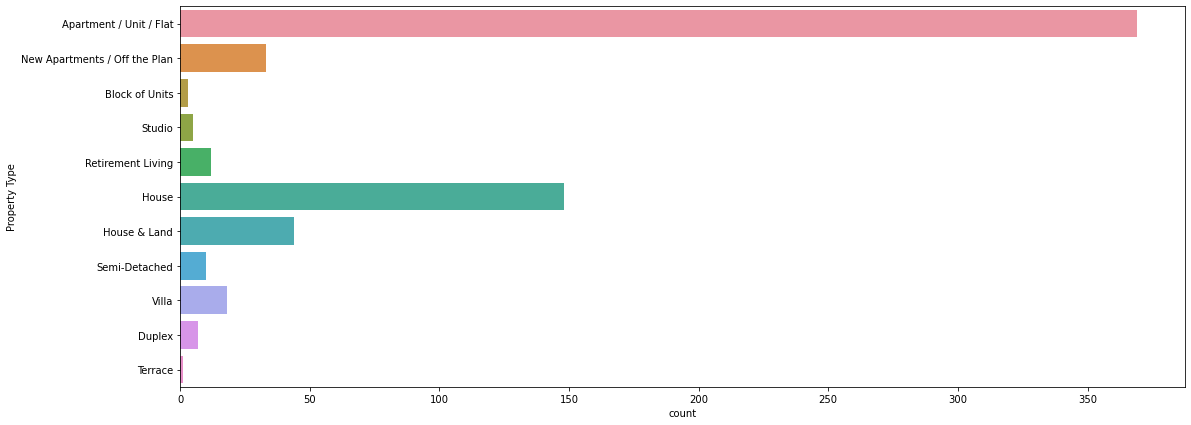

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
sns.countplot(y="Property Type", data=dataWithEmptyValues)

In [16]:
# There appears to be 645 unique suburbs in this dataset
df['Suburb'].nunique()

645

In [15]:
df['Suburb'].value_counts()

SCHOFIELDS         22
RIVERSTONE         21
BOX HILL           18
LIDCOMBE           16
SPRING FARM        15
                   ..
HAMMONDVILLE        1
WHEELER HEIGHTS     1
NORTH NARRABEEN     1
WOODFORD            1
WILEY PARK          1
Name: Suburb, Length: 645, dtype: int64